<a href="https://colab.research.google.com/github/osalex800/Analisis-y-visualizacion-de-datos/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para un analista de datos, el ANOVA (Análisis de Varianza) es la herramienta fundamental para comparar medias entre tres o más grupos y determinar si las diferencias observadas son estadísticamente significativas o fruto del azar.

Guía de la Práctica:
* He creado tres grupos con medias intencionalmente diferentes ($20, 22, 19$) para que el ejercicio resulte en un hallazgo significativo.
* Supuestos: Antes de confiar en el ANOVA, ejecutamos shapiro.test y leveneTest. En el mundo real, si estos fallan, deberías considerar una alternativa no paramétrica como Kruskal-Wallis.
* Interpretación: Fíjate en la columna Pr(>F). Si hay asteriscos (***), significa que el fertilizante realmente tiene un impacto en el crecimiento.
* Tukey HSD: El ANOVA solo te dice que "algo es diferente", pero no te dice "cuál es mejor". La prueba de Tukey compara los grupos de dos en dos para darte esa respuesta.

Loading required package: ggplot2

Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



[1] "Visualizando distribución de los grupos..."
[1] "Prueba de Normalidad (Shapiro-Wilk):"


data_anova$fertilizante: A

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97894, p-value = 0.7966

------------------------------------------------------------ 
data_anova$fertilizante: B

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.98662, p-value = 0.9614

------------------------------------------------------------ 
data_anova$fertilizante: C

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.98085, p-value = 0.8478


[1] "Prueba de Homocedasticidad (Levene Test):"


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.6445625,0.5273801
,87,NA,NA


[1] "Resultado del ANOVA:"
             Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizante  2  176.8   88.41   27.44 5.75e-10 ***
Residuals    87  280.3    3.22                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "El ANOVA es significativo. Realizando prueba de Tukey..."
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = crecimiento ~ fertilizante, data = data_anova)

$fertilizante
          diff       lwr       upr     p adj
B-A  2.4508842  1.345783  3.555985 0.0000027
C-A -0.8569517 -1.962052  0.248149 0.1599277
C-B -3.3078359 -4.412937 -2.202735 0.0000000



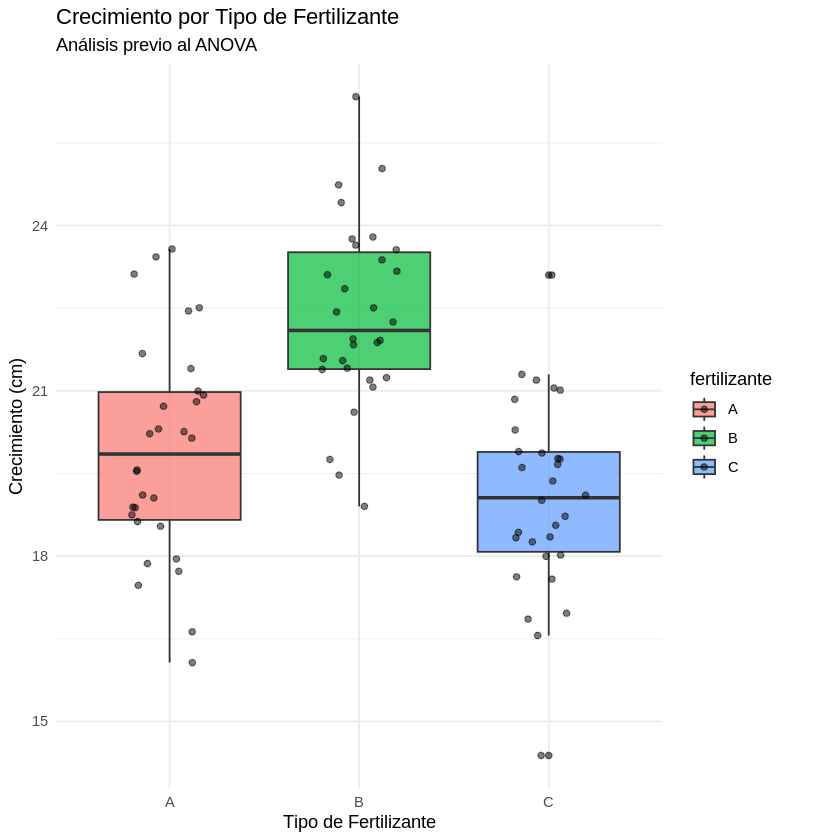

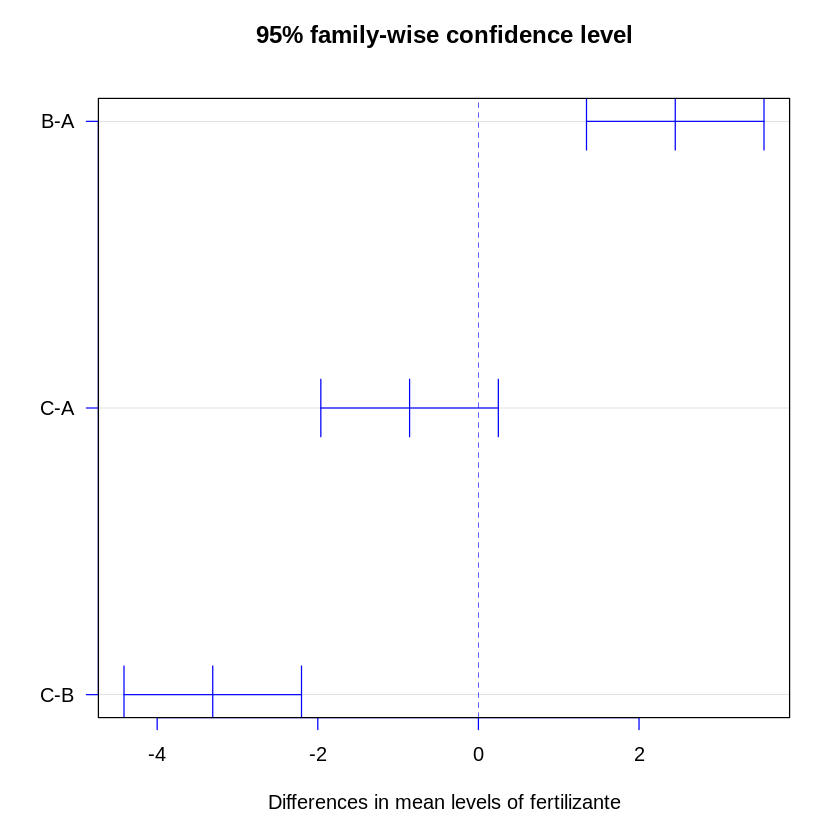

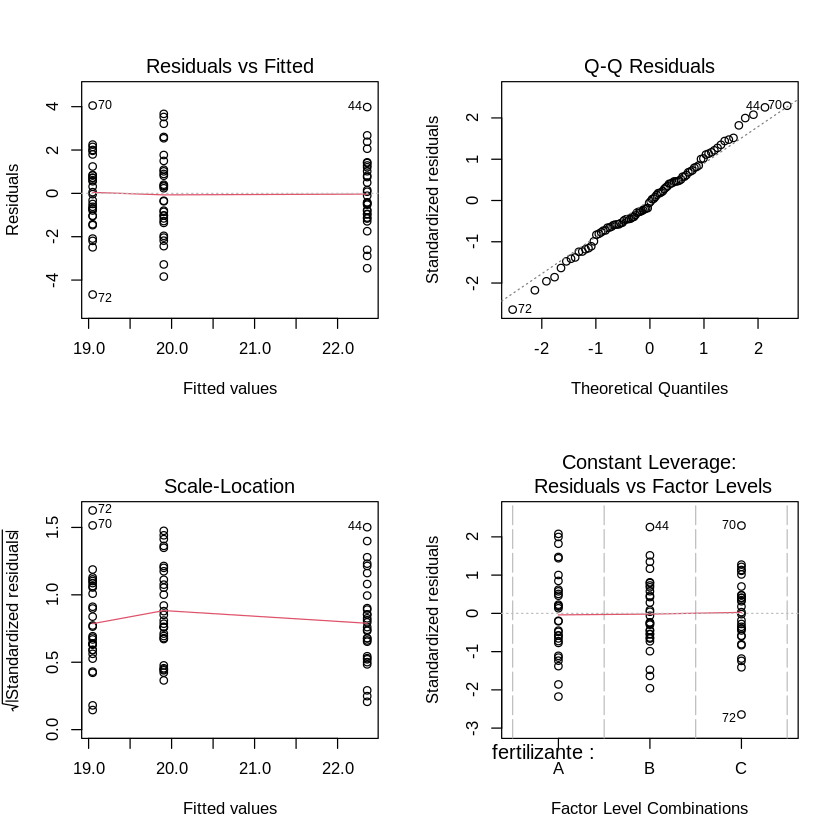

In [1]:
# ================================================================= #
# PRÁCTICA DE ANÁLISIS DE VARIANZA (ANOVA)                          #
# Objetivo: Validar si el tipo de fertilizante influye en el        #
# crecimiento de una planta.                                        #
# ================================================================= #

# 1. Preparación del Entorno
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("car")) install.packages("car")

library(ggplot2)
library(car)

# 2. Generación de Datos Sintéticos
# Supongamos 3 tipos de fertilizantes (A, B, C) y 30 muestras cada uno
set.seed(123) # Para reproducibilidad

data_anova <- data.frame(
  fertilizante = rep(c("A", "B", "C"), each = 30),
  crecimiento = c(
    rnorm(30, mean = 20, sd = 2), # Fertilizante A (Media 20)
    rnorm(30, mean = 22, sd = 2), # Fertilizante B (Media 22)
    rnorm(30, mean = 19, sd = 2)  # Fertilizante C (Media 19)
  )
)

# 3. Análisis Exploratorio de Datos (EDA)
# Visualizar la distribución mediante un Boxplot
print("Visualizando distribución de los grupos...")
ggplot(data_anova, aes(x = fertilizante, y = crecimiento, fill = fertilizante)) +
  geom_boxplot(alpha = 0.7) +
  geom_jitter(width = 0.2, alpha = 0.5) +
  labs(title = "Crecimiento por Tipo de Fertilizante",
       subtitle = "Análisis previo al ANOVA",
       x = "Tipo de Fertilizante",
       y = "Crecimiento (cm)") +
  theme_minimal()

# 4. Verificación de Supuestos
# ANOVA requiere: Normalidad y Homocedasticidad (varianzas iguales)

# A. Prueba de Normalidad (Shapiro-Wilk por grupo)
print("Prueba de Normalidad (Shapiro-Wilk):")
by(data_anova$crecimiento, data_anova$fertilizante, shapiro.test)
# Interpretación: Si p-value > 0.05, los datos son normales.

# B. Prueba de Homocedasticidad (Prueba de Levene)
print("Prueba de Homocedasticidad (Levene Test):")
leveneTest(crecimiento ~ fertilizante, data = data_anova)
# Interpretación: Si p-value > 0.05, las varianzas son iguales.

# 5. Ejecución del ANOVA
# H0: Todas las medias son iguales.
# H1: Al menos una media es diferente.
modelo_anova <- aov(crecimiento ~ fertilizante, data = data_anova)
resumen <- summary(modelo_anova)

print("Resultado del ANOVA:")
print(resumen)

# 6. Análisis Post-hoc (Tukey HSD)
# Si el ANOVA es significativo (p < 0.05), queremos saber QUÉ grupos difieren.
if (resumen[[1]]["Pr(>F)"][1,1] < 0.05) {
  print("El ANOVA es significativo. Realizando prueba de Tukey...")
  tukey_result <- TukeyHSD(modelo_anova)
  print(tukey_result)

  # Visualizar diferencias de Tukey
  plot(tukey_result, las = 1, col = "blue")
} else {
  print("No hay evidencia suficiente para rechazar H0. No se requiere Post-hoc.")
}

# 7. Diagnóstico del Modelo (Gráficos de Residuos)
par(mfrow = c(2, 2))
plot(modelo_anova)
par(mfrow = c(1, 1))